In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/train.csv')
test = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/test.csv')
meta_x_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature


In [127]:
train_y

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,0.895,0.187,0.477,9.123,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [128]:
df=train_y
df1=df[(df['Y_01']>=0.2)&(df['Y_01']<2.0)&(df['Y_02']>=0.2)
&(df['Y_02']<=2.1)&(df['Y_02']>=0.2)
&(df['Y_03']>=0.2)&(df['Y_03']<=2.1)
&(df['Y_04']<=19)&(df['Y_04']>=7)&(df['Y_05']<=36.5)&(df['Y_05']>=22)
&(df['Y_06']>=-19.2)&(df['Y_06']<=19)&(df['Y_07']>=2.4)&(df['Y_07']<=4)
&(df['Y_08']>=-29.2)&(df['Y_08']<=-24)&(df['Y_09']>=-29.2)&(df['Y_09']<=-24)
&(df['Y_10']>=-30.6)&(df['Y_10']<=-20)&(df['Y_11']>=19.6)&(df['Y_11']<=26.6)
&(df['Y_12']>=-29.2)&(df['Y_12']<=-24)&(df['Y_13']>=-29.2)&(df['Y_13']<=-24)
&(df['Y_14']>=-29.2)&(df['Y_14']<=-24)]
len(df1.index)



35687

In [129]:
for idx in range(0,39607):
    if idx in df1.index:
        train_x.loc[idx,'X_60']=1
    else:
        train_x.loc[idx,'X_60']=0
train_x['X_60'].value_counts()

c:\Users\Lee Dong woo\Desktop\Python 3.9\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\Lee Dong woo\Desktop\Python 3.9\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1.0    35687
0.0     3920
Name: X_60, dtype: int64

In [130]:
train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,0.0
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.0
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.0
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.0
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,1.0
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,1.0
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,1.0
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929,0.0


In [131]:
df1 = train_x.query('X_60 ==1')
df2= train_x.query('X_60==0')
df1
#진짜통과한애들 df1, 따져봤을때 통과못한애들(14개 변수 모두 정상범위에 있지 않은 제품들)df2

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.0
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.0
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.0
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,1.0
5,69.524,103.320,62.77,1,101.899,69.884,27.90,64.97,241.85,0.0,...,1,9514.23,137.649365,124.373890,145.751970,121.860937,127.081180,139.840405,123.946308,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,64.425,103.320,63.87,1,102.037,68.864,30.40,99.99,199.55,0.0,...,1,60707.83,128.922673,128.715023,137.359163,125.521040,130.121288,138.584111,121.000820,1.0
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,1.0
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,1.0
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,1.0


In [132]:
df1.index

Int64Index([    1,     2,     3,     4,     5,     7,     8,    10,    11,
               13,
            ...
            39595, 39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604,
            39606],
           dtype='int64', length=35687)

In [133]:
df1_target= train_y.loc[df1.index,:]
df2_target = train_y.drop(index=df1.index)
df2_target
df1_target


,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
5,1.155,0.678,0.580,11.760,29.662,16.201,3.343,-26.466,-26.527,-22.621,24.064,-26.489,-26.536,-26.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,1.556,1.418,1.328,12.598,32.671,16.949,2.996,-26.106,-26.281,-22.359,24.661,-26.134,-26.300,-26.306
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601


In [134]:
drop_x_cols=['X_04','X_23','X_47','X_48']

In [135]:
df1=df1.drop(columns=drop_x_cols)
df2=df2.drop(columns=drop_x_cols)
df1

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.0
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.0
3,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,0.0,...,1469,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.0
4,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,0.0,...,1469,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,1.0
5,69.524,103.320,62.77,101.899,69.884,27.90,64.97,241.85,0.0,0.0,...,1469,9514.23,137.649365,124.373890,145.751970,121.860937,127.081180,139.840405,123.946308,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,64.425,103.320,63.87,102.037,68.864,30.40,99.99,199.55,0.0,0.0,...,1469,60707.83,128.922673,128.715023,137.359163,125.521040,130.121288,138.584111,121.000820,1.0
39602,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,0.0,...,1469,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,1.0
39603,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,0.0,...,1458,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,1.0
39604,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,0.0,...,1459,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,1.0


df1: 온전히 통과한 제품들의 x_features

df1_target : df1의 target y_features

df2: 온전히 통과못한 제품들의 x_features

df2_target : df2의 target y_features

In [136]:
from sklearn.metrics import mean_squared_error
def nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,13): # ignore 'ID'
        rmse = mean_squared_error(np.array(gt)[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(np.array(gt)[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:15])
    return score

Passed

In [104]:
from sklearn.model_selection import train_test_split
x_train_pass, x_val_pass, y_train_pass, y_val_pass = train_test_split(df1, df1_target, 
test_size=0.2, random_state=42)


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_pass_scaled = scaler.fit_transform(x_train_pass)
x_val_pass_scaled=scaler.transform(x_val_pass)
x_train_pass=pd.DataFrame(x_train_pass_scaled, index=x_train_pass.index, columns=x_train_pass.columns)
x_val_pass = pd.DataFrame(x_val_pass_scaled,index=x_val_pass.index,columns=x_val_pass.columns)

In [106]:
import xgboost as xgb
xgb_1 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 1, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(x_train_pass, y_train_pass)
preds_1 = xgb_1.predict(x_val_pass)
score1=nrmse(y_val_pass,preds_1)

In [107]:
score1

1.6738666021247528

Non-PASS



In [108]:
x_train_fail, x_val_fail, y_train_fail, y_val_fail = train_test_split(df2, df2_target, 
test_size=0.2, random_state=42)

In [109]:
scaler = StandardScaler()
x_train_fail_scaled = scaler.fit_transform(x_train_fail)
x_val_fail_scaled=scaler.transform(x_val_fail)
x_train_fail=pd.DataFrame(x_train_fail_scaled, index=x_train_fail.index, columns=x_train_fail.columns)
x_val_fail = pd.DataFrame(x_val_fail_scaled,index=x_val_fail.index,columns=x_val_fail.columns)

In [110]:
xgb_2 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 1, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(x_train_fail, y_train_fail)
preds_2 = xgb_2.predict(x_val_fail)
score2=nrmse(y_val_fail,preds_2)
score2

3.0049936767968966

적은데이터로 학습하려다 보니 당연히 안좋을수밖에 없음... 실제로 불량이라는 건 이상치데이터일 가능성이 매우 높으므로 OVERFIT이 더 나을듯

In [117]:
train_x = train_x.drop(columns=drop_x_cols)

In [118]:
x_train_total, x_val_total, y_train_total, y_val_total = train_test_split(train_x, train_y, 
test_size=0.2, random_state=42)


In [119]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_total)
x_val_scaled=scaler.transform(x_val_total)
x_train_total=pd.DataFrame(x_train_scaled, index=x_train_total.index, columns=x_train_total.columns)
x_val_total = pd.DataFrame(x_val_scaled,index=x_val_total.index,columns=x_val_total.columns)

In [120]:
xgb_3 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 1, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(x_train_total, y_train_total)
preds_3 = xgb_3.predict(x_val_total)
score3=nrmse(y_val_total,preds_3)
score3

1.8643316339925176

In [121]:
list_1=xgb_1.estimators_[0].feature_importances_
list_1=np.array(list_1)
sort_list_1 = np.argsort(list_1)
sort_list_1

array([52,  1,  9,  8, 32, 14, 29, 22, 41, 31, 49, 42, 26, 35, 39, 38, 40,
       13, 24, 48, 45, 25, 10, 33, 19, 12, 21,  0,  6, 51, 34,  3, 36, 23,
       43, 30, 50, 47, 46, 37, 27,  7, 28,  4, 15,  2, 11, 16, 44, 17, 18,
        5, 20], dtype=int64)

In [122]:
list_2=xgb_3.estimators_[0].feature_importances_
list_2=np.array(list_2)
sort_list_2 = np.argsort(list_2)
sort_list_2

array([ 9,  8,  1, 13, 10, 15, 22, 49,  4, 37, 36, 39, 47, 26, 34, 33, 50,
       32, 35, 11, 21, 45, 43, 46, 27, 12, 28, 24, 48, 25, 31, 30, 51, 40,
       29, 14,  6, 38,  3,  7, 41,  2, 42, 23,  0, 16, 19, 18, 44, 20, 17,
        5, 52], dtype=int64)

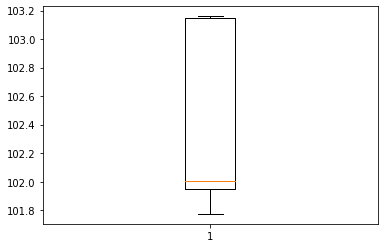

In [137]:
import matplotlib.pyplot as plt
plt.boxplot(df1['X_05'],sym='bo')
plt.show()

In [143]:
df1['X_05'].describe()

count    35687.000000
mean       102.342276
std          0.550146
min        101.774000
25%        101.950000
50%        102.007000
75%        103.145000
max        103.160000
Name: X_05, dtype: float64

In [142]:
df2['X_05'].describe()

count    3920.000000
mean      102.291014
std         0.529585
min       101.782000
25%       101.945000
50%       101.997000
75%       103.137000
max       103.160000
Name: X_05, dtype: float64

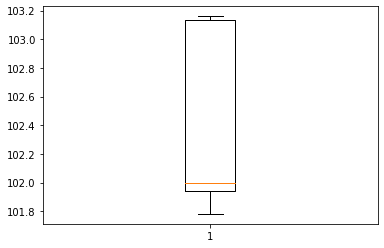

In [138]:
plt.boxplot(df2['X_05'],sym='bo')
plt.show()

In [144]:
train_x['X_46'].value_counts()

1469    34088
1465      881
1464      780
1468      696
1466      610
1463      549
1467      389
1462      365
1461      308
1460      305
1459      259
1458      197
1457      180
Name: X_46, dtype: int64

In [116]:
train_y

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,0.895,0.187,0.477,9.123,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635
